## Part 1- Data Coding and Merging

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import NHL Team Data and Display
NHL_Team=pd.read_csv("Data\NHL_team.csv")
NHL_Team.head()

,Unnamed: 0,tid,name,tname,lname,tricode,abbr,sname
0,1,1,Toronto Maple Leafs,Maple Leafs,Toronto,TOR,TOR,Toronto
1,2,2,Montréal Canadiens,Canadiens,Montréal,MTL,MTL,Montréal
2,3,4,Winnipeg Jets,Jets,Winnipeg,WPG,WPG,Winnipeg
3,4,5,Washington Capitals,Capitals,Washington,WSH,WSH,Washington
4,5,6,Chicago Blackhawks,Blackhawks,Chicago,CHI,CHI,Chicago


In [3]:
NHL_Team.columns

Index(['Unnamed: 0', 'tid', 'name', 'tname', 'lname', 'tricode', 'abbr',
       'sname'],
      dtype='object')

In [4]:
#Dropping unwanted columns
NHL_Team.drop(['Unnamed: 0','abbr','tname','lname','sname'], axis = 1, inplace = True)
NHL_Team.head()

,tid,name,tricode
0,1,Toronto Maple Leafs,TOR
1,2,Montréal Canadiens,MTL
2,4,Winnipeg Jets,WPG
3,5,Washington Capitals,WSH
4,6,Chicago Blackhawks,CHI


In [5]:
#renaming column 
NHL_Team.rename(columns = {'name':'team_name'}, inplace = True)
NHL_Team.head()

,tid,team_name,tricode
0,1,Toronto Maple Leafs,TOR
1,2,Montréal Canadiens,MTL
2,4,Winnipeg Jets,WPG
3,5,Washington Capitals,WSH
4,6,Chicago Blackhawks,CHI


In [6]:
#Import NHL Competition Data and Display Head
NHL_Competition=pd.read_csv("Data\NHL_competition.csv")
NHL_Competition.head()

,Unnamed: 0,comp_id,year,type,name,tz,start,end
0,1,1,2013,2,2013 NHL Regular Season,ET,NaN,NaN
1,2,2,2017,2,2017 NHL Regular Season,ET,NaN,NaN
2,3,2453,2013,3,2013 NHL Playoff,ET,NaN,NaN
3,4,2541,2017,3,2017 NHL Playoff,ET,NaN,NaN
4,5,2661,2012,2,2012 NHL Regular Season,ET,NaN,NaN


In [7]:
#dropping uneanted columns
NHL_Competition.drop(['Unnamed: 0','tz','start','end'], axis = 1, inplace = True)
NHL_Competition.columns

Index(['comp_id', 'year', 'type', 'name'], dtype='object')

In [8]:
#Import NHL Game Data and Display Head
NHL_Game=pd.read_csv("Data\NHL_game.csv")
NHL_Game.head()

,X,gid,comp_id,date,ascore,hscore,period,status,home_away,tid
0,1,37,2,10/7/2017,NaN,NaN,NaN,NaN,away,25
1,2,67,2,10/9/2017,NaN,NaN,NaN,NaN,away,29
2,3,154,1,10/14/2013,NaN,NaN,NaN,NaN,away,29
3,4,278,1,10/24/2013,NaN,NaN,NaN,NaN,away,53
4,5,291,1,10/25/2013,NaN,NaN,NaN,NaN,away,5


In [9]:
#Dropping unwanted column
NHL_Game.drop(['X','period','status'], axis = 1, inplace = True)
NHL_Game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid
0,37,2,10/7/2017,NaN,NaN,away,25
1,67,2,10/9/2017,NaN,NaN,away,29
2,154,1,10/14/2013,NaN,NaN,away,29
3,278,1,10/24/2013,NaN,NaN,away,53
4,291,1,10/25/2013,NaN,NaN,away,5


In [10]:
NHL_Game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid
0,37,2,10/7/2017,NaN,NaN,away,25
1,67,2,10/9/2017,NaN,NaN,away,29
2,154,1,10/14/2013,NaN,NaN,away,29
3,278,1,10/24/2013,NaN,NaN,away,53
4,291,1,10/25/2013,NaN,NaN,away,5


In [11]:
#merging team data with the game data
NHL_Game = pd.merge(NHL_Team, NHL_Game, on = 'tid')
NHL_Game.head()

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away
0,1,Toronto Maple Leafs,TOR,741,1,11/28/2013,NaN,NaN,away
1,1,Toronto Maple Leafs,TOR,782,1,12/1/2013,NaN,NaN,away
2,1,Toronto Maple Leafs,TOR,5225,5181,4/25/2017,NaN,NaN,away
3,1,Toronto Maple Leafs,TOR,6557,5385,1/7/2016,NaN,NaN,away
4,1,Toronto Maple Leafs,TOR,6914,5385,2/7/2016,NaN,NaN,away


In [12]:
#merging games data with competition data based on competition id
NHL_Game = pd.merge(NHL_Game, NHL_Competition, on = 'comp_id')
NHL_Game.head()

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away,year,type,name
0,1,Toronto Maple Leafs,TOR,741,1,11/28/2013,NaN,NaN,away,2013,2,2013 NHL Regular Season
1,1,Toronto Maple Leafs,TOR,782,1,12/1/2013,NaN,NaN,away,2013,2,2013 NHL Regular Season
2,1,Toronto Maple Leafs,TOR,1003,1,12/17/2013,1.0,3.0,away,2013,2,2013 NHL Regular Season
3,1,Toronto Maple Leafs,TOR,1552,1,1/26/2014,4.0,5.0,away,2013,2,2013 NHL Regular Season
4,1,Toronto Maple Leafs,TOR,1811,1,3/2/2014,3.0,4.0,away,2013,2,2013 NHL Regular Season


In [13]:
#Creating a new variable
NHL_Game['hgd'] = NHL_Game['hscore'] - NHL_Game['ascore']
NHL_Game.head()

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away,year,type,name,hgd
0,1,Toronto Maple Leafs,TOR,741,1,11/28/2013,NaN,NaN,away,2013,2,2013 NHL Regular Season,NaN
1,1,Toronto Maple Leafs,TOR,782,1,12/1/2013,NaN,NaN,away,2013,2,2013 NHL Regular Season,NaN
2,1,Toronto Maple Leafs,TOR,1003,1,12/17/2013,1.0,3.0,away,2013,2,2013 NHL Regular Season,2.0
3,1,Toronto Maple Leafs,TOR,1552,1,1/26/2014,4.0,5.0,away,2013,2,2013 NHL Regular Season,1.0
4,1,Toronto Maple Leafs,TOR,1811,1,3/2/2014,3.0,4.0,away,2013,2,2013 NHL Regular Season,1.0


In [14]:
#Dropping empty rows
NHL_Game = NHL_Game[pd.notnull(NHL_Game['hgd'])]
NHL_Game['hgd'].isnull().sum()

0

In [15]:
#Import NHL PPPK Data and Display Head
NHL_PPPK=pd.read_csv("Data\\pp.pk.ppgf.csv")
NHL_PPPK.head()

,tricode,pp,pk,ppgf,competition_name
0,ANA,35,27,9.0,2010 NHL Playoff
1,BOS,126,116,22.0,2010 NHL Playoff
2,BUF,48,46,13.0,2010 NHL Playoff
3,CHI,27,39,6.0,2010 NHL Playoff
4,DET,59,55,6.0,2010 NHL Playoff


In [16]:
NHL_Game.isnull().sum()

tid          0
team_name    0
tricode      0
gid          0
comp_id      0
date         0
ascore       0
hscore       0
home_away    0
year         0
type         0
name         0
hgd          0
dtype: int64

In [17]:
NHL_Game.head()

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away,year,type,name,hgd
2,1,Toronto Maple Leafs,TOR,1003,1,12/17/2013,1.0,3.0,away,2013,2,2013 NHL Regular Season,2.0
3,1,Toronto Maple Leafs,TOR,1552,1,1/26/2014,4.0,5.0,away,2013,2,2013 NHL Regular Season,1.0
4,1,Toronto Maple Leafs,TOR,1811,1,3/2/2014,3.0,4.0,away,2013,2,2013 NHL Regular Season,1.0
5,1,Toronto Maple Leafs,TOR,1940,1,3/11/2014,3.0,1.0,away,2013,2,2013 NHL Regular Season,-2.0
6,1,Toronto Maple Leafs,TOR,1522,1,1/24/2014,1.0,7.0,away,2013,2,2013 NHL Regular Season,6.0


In [18]:
#coverting the date column from text into date format
import datetime
NHL_Game['date'] = pd.to_datetime(NHL_Game['date'])
NHL_Game.head()

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away,year,type,name,hgd
2,1,Toronto Maple Leafs,TOR,1003,1,2013-12-17,1.0,3.0,away,2013,2,2013 NHL Regular Season,2.0
3,1,Toronto Maple Leafs,TOR,1552,1,2014-01-26,4.0,5.0,away,2013,2,2013 NHL Regular Season,1.0
4,1,Toronto Maple Leafs,TOR,1811,1,2014-03-02,3.0,4.0,away,2013,2,2013 NHL Regular Season,1.0
5,1,Toronto Maple Leafs,TOR,1940,1,2014-03-11,3.0,1.0,away,2013,2,2013 NHL Regular Season,-2.0
6,1,Toronto Maple Leafs,TOR,1522,1,2014-01-24,1.0,7.0,away,2013,2,2013 NHL Regular Season,6.0


In [19]:
#sort values by date
NHL_Game.sort_values(by = 'date', ascending = 'False').head(15)

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away,year,type,name,hgd
7652,1,Toronto Maple Leafs,TOR,5662,5662,2010-10-07,2.0,3.0,home,2010,2,2010 NHL Regular Season,1.0
7699,2,Montréal Canadiens,MTL,5662,5662,2010-10-07,2.0,3.0,away,2010,2,2010 NHL Regular Season,1.0
8251,14,Philadelphia Flyers,PHI,5664,5662,2010-10-07,3.0,2.0,away,2010,2,2010 NHL Regular Season,-1.0
9271,35,Minnesota Wild,MIN,5666,5662,2010-10-07,4.0,3.0,home,2010,2,2010 NHL Regular Season,-1.0
9882,66,Carolina Hurricanes,CAR,5666,5662,2010-10-07,4.0,3.0,away,2010,2,2010 NHL Regular Season,-1.0
8043,8,Pittsburgh Penguins,PIT,5664,5662,2010-10-07,3.0,2.0,home,2010,2,2010 NHL Regular Season,-1.0
9103,29,New Jersey Devils,NJD,5674,5662,2010-10-08,4.0,3.0,home,2010,2,2010 NHL Regular Season,-1.0
9469,46,Dallas Stars,DAL,5674,5662,2010-10-08,4.0,3.0,away,2010,2,2010 NHL Regular Season,-1.0
7760,5,Washington Capitals,WSH,5683,5662,2010-10-08,2.0,4.0,away,2010,2,2010 NHL Regular Season,2.0
9233,35,Minnesota Wild,MIN,5677,5662,2010-10-08,1.0,2.0,away,2010,2,2010 NHL Regular Season,1.0


In [20]:
NHL_Game.columns

Index(['tid', 'team_name', 'tricode', 'gid', 'comp_id', 'date', 'ascore',
       'hscore', 'home_away', 'year', 'type', 'name', 'hgd'],
      dtype='object')

In [21]:
#extracting games played home
NHL_Home = NHL_Game[NHL_Game.home_away == 'home']
NHL_Home.head()

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away,year,type,name,hgd
42,1,Toronto Maple Leafs,TOR,307,1,2013-10-26,1.0,4.0,home,2013,2,2013 NHL Regular Season,3.0
43,1,Toronto Maple Leafs,TOR,682,1,2013-11-24,2.0,3.0,home,2013,2,2013 NHL Regular Season,1.0
44,1,Toronto Maple Leafs,TOR,2150,1,2014-03-25,5.0,3.0,home,2013,2,2013 NHL Regular Season,-2.0
45,1,Toronto Maple Leafs,TOR,2067,1,2014-03-19,5.0,3.0,home,2013,2,2013 NHL Regular Season,-2.0
46,1,Toronto Maple Leafs,TOR,2281,1,2014-04-03,3.0,4.0,home,2013,2,2013 NHL Regular Season,1.0


In [22]:
#Renaming columns
NHL_Home.rename(columns = {'ascore': 'goals_for', 'hscore': 'goal_against'}, inplace = True)
NHL_Home.head()

c:\Users\Abdul-Majeed-PC\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,tid,team_name,tricode,gid,comp_id,date,goals_for,goal_against,home_away,year,type,name,hgd
42,1,Toronto Maple Leafs,TOR,307,1,2013-10-26,1.0,4.0,home,2013,2,2013 NHL Regular Season,3.0
43,1,Toronto Maple Leafs,TOR,682,1,2013-11-24,2.0,3.0,home,2013,2,2013 NHL Regular Season,1.0
44,1,Toronto Maple Leafs,TOR,2150,1,2014-03-25,5.0,3.0,home,2013,2,2013 NHL Regular Season,-2.0
45,1,Toronto Maple Leafs,TOR,2067,1,2014-03-19,5.0,3.0,home,2013,2,2013 NHL Regular Season,-2.0
46,1,Toronto Maple Leafs,TOR,2281,1,2014-04-03,3.0,4.0,home,2013,2,2013 NHL Regular Season,1.0


In [23]:
#Extracting games played away
NHL_Away = NHL_Game[(NHL_Game.home_away == 'away')]
NHL_Away.rename( columns = {'hscore': 'goals_for', 'ascore': 'goals_against'})
NHL_Away.head()

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away,year,type,name,hgd
2,1,Toronto Maple Leafs,TOR,1003,1,2013-12-17,1.0,3.0,away,2013,2,2013 NHL Regular Season,2.0
3,1,Toronto Maple Leafs,TOR,1552,1,2014-01-26,4.0,5.0,away,2013,2,2013 NHL Regular Season,1.0
4,1,Toronto Maple Leafs,TOR,1811,1,2014-03-02,3.0,4.0,away,2013,2,2013 NHL Regular Season,1.0
5,1,Toronto Maple Leafs,TOR,1940,1,2014-03-11,3.0,1.0,away,2013,2,2013 NHL Regular Season,-2.0
6,1,Toronto Maple Leafs,TOR,1522,1,2014-01-24,1.0,7.0,away,2013,2,2013 NHL Regular Season,6.0


In [24]:
NHL_Home.head()

,tid,team_name,tricode,gid,comp_id,date,goals_for,goal_against,home_away,year,type,name,hgd
42,1,Toronto Maple Leafs,TOR,307,1,2013-10-26,1.0,4.0,home,2013,2,2013 NHL Regular Season,3.0
43,1,Toronto Maple Leafs,TOR,682,1,2013-11-24,2.0,3.0,home,2013,2,2013 NHL Regular Season,1.0
44,1,Toronto Maple Leafs,TOR,2150,1,2014-03-25,5.0,3.0,home,2013,2,2013 NHL Regular Season,-2.0
45,1,Toronto Maple Leafs,TOR,2067,1,2014-03-19,5.0,3.0,home,2013,2,2013 NHL Regular Season,-2.0
46,1,Toronto Maple Leafs,TOR,2281,1,2014-04-03,3.0,4.0,home,2013,2,2013 NHL Regular Season,1.0


In [25]:
#creating a variable win based goals scored and conceded for the home games
import numpy as np
NHL_Home['win'] = np.where(NHL_Home['goals_for'] > NHL_Home['goal_against'], 1, np.where(NHL_Home['goals_for'] < NHL_Home['goal_against'], 0, 0.5))
NHL_Home.head()

<ipython-input-25-804d8650a190>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NHL_Home['win'] = np.where(NHL_Home['goals_for'] > NHL_Home['goal_against'], 1, np.where(NHL_Home['goals_for'] < NHL_Home['goal_against'], 0, 0.5))


,tid,team_name,tricode,gid,comp_id,date,goals_for,goal_against,home_away,year,type,name,hgd,win
42,1,Toronto Maple Leafs,TOR,307,1,2013-10-26,1.0,4.0,home,2013,2,2013 NHL Regular Season,3.0,0.0
43,1,Toronto Maple Leafs,TOR,682,1,2013-11-24,2.0,3.0,home,2013,2,2013 NHL Regular Season,1.0,0.0
44,1,Toronto Maple Leafs,TOR,2150,1,2014-03-25,5.0,3.0,home,2013,2,2013 NHL Regular Season,-2.0,1.0
45,1,Toronto Maple Leafs,TOR,2067,1,2014-03-19,5.0,3.0,home,2013,2,2013 NHL Regular Season,-2.0,1.0
46,1,Toronto Maple Leafs,TOR,2281,1,2014-04-03,3.0,4.0,home,2013,2,2013 NHL Regular Season,1.0,0.0


In [26]:
NHL_Away.head()

,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away,year,type,name,hgd
2,1,Toronto Maple Leafs,TOR,1003,1,2013-12-17,1.0,3.0,away,2013,2,2013 NHL Regular Season,2.0
3,1,Toronto Maple Leafs,TOR,1552,1,2014-01-26,4.0,5.0,away,2013,2,2013 NHL Regular Season,1.0
4,1,Toronto Maple Leafs,TOR,1811,1,2014-03-02,3.0,4.0,away,2013,2,2013 NHL Regular Season,1.0
5,1,Toronto Maple Leafs,TOR,1940,1,2014-03-11,3.0,1.0,away,2013,2,2013 NHL Regular Season,-2.0
6,1,Toronto Maple Leafs,TOR,1522,1,2014-01-24,1.0,7.0,away,2013,2,2013 NHL Regular Season,6.0


In [27]:
#creating a variable win based goals scored and conceded for the home games
NHL_Away['w'] = np.where(NHL_Away['ascore'] > NHL_Away['hscore'], 1, np.where(NHL_Away['ascore'] < NHL_Away['hscore'], 0, 0.5))
NHL_Away.head()

<ipython-input-27-1f6fd24f4e6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NHL_Away['w'] = np.where(NHL_Away['ascore'] > NHL_Away['hscore'], 1, np.where(NHL_Away['ascore'] < NHL_Away['hscore'], 0, 0.5))


,tid,team_name,tricode,gid,comp_id,date,ascore,hscore,home_away,year,type,name,hgd,w
2,1,Toronto Maple Leafs,TOR,1003,1,2013-12-17,1.0,3.0,away,2013,2,2013 NHL Regular Season,2.0,0.0
3,1,Toronto Maple Leafs,TOR,1552,1,2014-01-26,4.0,5.0,away,2013,2,2013 NHL Regular Season,1.0,0.0
4,1,Toronto Maple Leafs,TOR,1811,1,2014-03-02,3.0,4.0,away,2013,2,2013 NHL Regular Season,1.0,0.0
5,1,Toronto Maple Leafs,TOR,1940,1,2014-03-11,3.0,1.0,away,2013,2,2013 NHL Regular Season,-2.0,1.0
6,1,Toronto Maple Leafs,TOR,1522,1,2014-01-24,1.0,7.0,away,2013,2,2013 NHL Regular Season,6.0,0.0


In [28]:
#Appending away games to the home games
NHL_Game = NHL_Home.append(NHL_Away, ignore_index = True)
NHL_Game.head()

,tid,team_name,tricode,gid,comp_id,date,goals_for,goal_against,home_away,year,type,name,hgd,win,ascore,hscore,w
0,1,Toronto Maple Leafs,TOR,307,1,2013-10-26,1.0,4.0,home,2013,2,2013 NHL Regular Season,3.0,0.0,NaN,NaN,NaN
1,1,Toronto Maple Leafs,TOR,682,1,2013-11-24,2.0,3.0,home,2013,2,2013 NHL Regular Season,1.0,0.0,NaN,NaN,NaN
2,1,Toronto Maple Leafs,TOR,2150,1,2014-03-25,5.0,3.0,home,2013,2,2013 NHL Regular Season,-2.0,1.0,NaN,NaN,NaN
3,1,Toronto Maple Leafs,TOR,2067,1,2014-03-19,5.0,3.0,home,2013,2,2013 NHL Regular Season,-2.0,1.0,NaN,NaN,NaN
4,1,Toronto Maple Leafs,TOR,2281,1,2014-04-03,3.0,4.0,home,2013,2,2013 NHL Regular Season,1.0,0.0,NaN,NaN,NaN


In [34]:
#Aggregating teams statistics
NHL_Team_Stats = NHL_Game.groupby(['tid', 'comp_id', 'name', 'type'])['team_name', 'goals_for', 'goal_against', 'win'].sum().reset_index()
NHL_Team_Stats.head(20)

<ipython-input-34-3f0b59b9256a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  NHL_Team_Stats = NHL_Game.groupby(['tid', 'comp_id', 'name', 'type'])['team_name', 'goals_for', 'goal_against', 'win'].sum().reset_index()


,tid,comp_id,name,type,goals_for,goal_against,win
0,1,1,2013 NHL Regular Season,2,127.0,135.0,16.0
1,1,2,2017 NHL Regular Season,2,108.0,134.0,11.0
2,1,2541,2017 NHL Playoff,3,6.0,8.0,1.0
3,1,2661,2012 NHL Regular Season,2,66.0,71.0,10.0
4,1,2734,2016 NHL Regular Season,2,118.0,126.0,20.0
5,1,4099,2012 NHL Playoff,3,10.0,7.0,2.0
6,1,4287,2011 NHL Regular Season,2,61.0,60.0,9.0
7,1,5181,2016 NHL Playoff,3,10.0,9.0,2.0
8,1,5385,2015 NHL Regular Season,2,116.0,111.0,25.0
9,1,5662,2010 NHL Regular Season,2,126.0,115.0,24.0


In [41]:
#Games Played by each team in each competition
NHL_Game_Count=NHL_Game.groupby(['tid','comp_id', 'type']).size().reset_index(name='game_count')
display(NHL_Game_Count)

,tid,comp_id,type,game_count
0,1,1,2,79
1,1,2,2,79
2,1,2541,3,7
3,1,2661,2,46
4,1,2734,2,82
...,...,...,...,...
364,66,4287,2,40
365,66,5385,2,81
366,66,5662,2,82
367,66,8011,2,82


In [42]:
#Merging the game count df with the team for df and stats df
NHL_Team_Stats = pd.merge(NHL_Team_Stats, NHL_Game_Count, on = ['tid', 'comp_id', 'type'])
NHL_Team_Stats = pd.merge(NHL_Team, NHL_Team_Stats, on = 'tid')
NHL_Team_Stats.head(10)

,tid,team_name,tricode,comp_id,name,type,goals_for,goal_against,win,game_count
0,1,Toronto Maple Leafs,TOR,1,2013 NHL Regular Season,2,127.0,135.0,16.0,79
1,1,Toronto Maple Leafs,TOR,2,2017 NHL Regular Season,2,108.0,134.0,11.0,79
2,1,Toronto Maple Leafs,TOR,2541,2017 NHL Playoff,3,6.0,8.0,1.0,7
3,1,Toronto Maple Leafs,TOR,2661,2012 NHL Regular Season,2,66.0,71.0,10.0,46
4,1,Toronto Maple Leafs,TOR,2734,2016 NHL Regular Season,2,118.0,126.0,20.0,82
5,1,Toronto Maple Leafs,TOR,4099,2012 NHL Playoff,3,10.0,7.0,2.0,7
6,1,Toronto Maple Leafs,TOR,4287,2011 NHL Regular Season,2,61.0,60.0,9.0,40
7,1,Toronto Maple Leafs,TOR,5181,2016 NHL Playoff,3,10.0,9.0,2.0,6
8,1,Toronto Maple Leafs,TOR,5385,2015 NHL Regular Season,2,116.0,111.0,25.0,79
9,1,Toronto Maple Leafs,TOR,5662,2010 NHL Regular Season,2,126.0,115.0,24.0,82


In [43]:
#Import NHL PPPK Data and Display Head
NHL_PPPK=pd.read_csv("Data\pp.pk.ppgf.csv")
NHL_PPPK.head()

,tricode,pp,pk,ppgf,competition_name
0,ANA,35,27,9.0,2010 NHL Playoff
1,BOS,126,116,22.0,2010 NHL Playoff
2,BUF,48,46,13.0,2010 NHL Playoff
3,CHI,27,39,6.0,2010 NHL Playoff
4,DET,59,55,6.0,2010 NHL Playoff


In [44]:
#Renaming column
NHL_PPPK.rename(columns = {'competition_name': 'name'}, inplace = True)
NHL_PPPK.head()

,tricode,pp,pk,ppgf,name
0,ANA,35,27,9.0,2010 NHL Playoff
1,BOS,126,116,22.0,2010 NHL Playoff
2,BUF,48,46,13.0,2010 NHL Playoff
3,CHI,27,39,6.0,2010 NHL Playoff
4,DET,59,55,6.0,2010 NHL Playoff


In [45]:
NHL_Team_Stats = pd.merge(NHL_Team_Stats, NHL_PPPK, on = ['tricode', 'name'])
NHL_Team_Stats.head(10)

,tid,team_name,tricode,comp_id,name,type,goals_for,goal_against,win,game_count,pp,pk,ppgf
0,1,Toronto Maple Leafs,TOR,1,2013 NHL Regular Season,2,127.0,135.0,16.0,79,362,342,61.0
1,1,Toronto Maple Leafs,TOR,2,2017 NHL Regular Season,2,108.0,134.0,11.0,79,256,245,58.0
2,1,Toronto Maple Leafs,TOR,2541,2017 NHL Playoff,3,6.0,8.0,1.0,7,26,21,4.0
3,1,Toronto Maple Leafs,TOR,2661,2012 NHL Regular Season,2,66.0,71.0,10.0,46,234,230,39.0
4,1,Toronto Maple Leafs,TOR,2734,2016 NHL Regular Season,2,118.0,126.0,20.0,82,321,321,69.0
5,1,Toronto Maple Leafs,TOR,4099,2012 NHL Playoff,3,10.0,7.0,2.0,7,30,29,5.0
6,1,Toronto Maple Leafs,TOR,4287,2011 NHL Regular Season,2,61.0,60.0,9.0,40,192,182,36.0
7,1,Toronto Maple Leafs,TOR,5181,2016 NHL Playoff,3,10.0,9.0,2.0,6,23,25,3.0
8,1,Toronto Maple Leafs,TOR,5385,2015 NHL Regular Season,2,116.0,111.0,25.0,79,324,307,27.0
9,1,Toronto Maple Leafs,TOR,5662,2010 NHL Regular Season,2,126.0,115.0,24.0,82,368,426,46.0


In [47]:
#Creating New Variables
NHL_Team_Stats['win_pct'] = NHL_Team_Stats['win'] / NHL_Team_Stats['game_count']
NHL_Team_Stats['avg_gf'] = NHL_Team_Stats['goals_for'] / NHL_Team_Stats['game_count']
NHL_Team_Stats['avg_ga'] = NHL_Team_Stats['goal_against'] / NHL_Team_Stats['game_count']
NHL_Team_Stats.head()

,tid,team_name,tricode,comp_id,name,type,goals_for,goal_against,win,game_count,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,Toronto Maple Leafs,TOR,1,2013 NHL Regular Season,2,127.0,135.0,16.0,79,362,342,61.0,0.202532,1.607595,1.708861
1,1,Toronto Maple Leafs,TOR,2,2017 NHL Regular Season,2,108.0,134.0,11.0,79,256,245,58.0,0.139241,1.367089,1.696203
2,1,Toronto Maple Leafs,TOR,2541,2017 NHL Playoff,3,6.0,8.0,1.0,7,26,21,4.0,0.142857,0.857143,1.142857
3,1,Toronto Maple Leafs,TOR,2661,2012 NHL Regular Season,2,66.0,71.0,10.0,46,234,230,39.0,0.217391,1.434783,1.543478
4,1,Toronto Maple Leafs,TOR,2734,2016 NHL Regular Season,2,118.0,126.0,20.0,82,321,321,69.0,0.243902,1.439024,1.536585


In [48]:
#Selecting games played on the regular season
NHL_Team_R_Stats = NHL_Team_Stats[(NHL_Team_Stats['type'] == 2)]
NHL_Team_R_Stats.head()

,tid,team_name,tricode,comp_id,name,type,goals_for,goal_against,win,game_count,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,Toronto Maple Leafs,TOR,1,2013 NHL Regular Season,2,127.0,135.0,16.0,79,362,342,61.0,0.202532,1.607595,1.708861
1,1,Toronto Maple Leafs,TOR,2,2017 NHL Regular Season,2,108.0,134.0,11.0,79,256,245,58.0,0.139241,1.367089,1.696203
3,1,Toronto Maple Leafs,TOR,2661,2012 NHL Regular Season,2,66.0,71.0,10.0,46,234,230,39.0,0.217391,1.434783,1.543478
4,1,Toronto Maple Leafs,TOR,2734,2016 NHL Regular Season,2,118.0,126.0,20.0,82,321,321,69.0,0.243902,1.439024,1.536585
6,1,Toronto Maple Leafs,TOR,4287,2011 NHL Regular Season,2,61.0,60.0,9.0,40,192,182,36.0,0.225000,1.525000,1.500000


## Part 2 - Descriptive and Summary Analyses

In [ ]:
NHL_Team_R_Stats.describe()

## Part 3 - Correlation Analyses


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
NHL_Team_Stats.corr()

,tid,comp_id,type,goals_for,goal_against,win,game_count,pp,pk,ppgf,win_pct,avg_gf,avg_ga
tid,1.000000,0.024750,-0.040735,0.058503,0.034088,0.070890,0.049870,0.054803,0.056755,0.001592,0.020974,0.018521,-0.016837
comp_id,0.024750,1.000000,0.357376,-0.328649,-0.342017,-0.270775,-0.321517,-0.292846,-0.294783,-0.277515,0.108001,-0.049452,-0.192644
type,-0.040735,0.357376,1.000000,-0.875490,-0.881546,-0.820006,-0.902698,-0.893732,-0.899646,-0.818119,0.220752,0.002028,-0.288452
goals_for,0.058503,-0.328649,-0.875490,1.000000,0.937655,0.953288,0.966339,0.939537,0.942894,0.840076,-0.116718,0.137259,0.277239
goal_against,0.034088,-0.342017,-0.881546,0.937655,1.000000,0.826394,0.974597,0.945154,0.955082,0.896734,-0.307658,-0.022241,0.413763
win,0.070890,-0.270775,-0.820006,0.953288,0.826394,1.000000,0.908963,0.883277,0.886755,0.753478,0.040717,0.153102,0.118955
game_count,0.049870,-0.321517,-0.902698,0.966339,0.974597,0.908963,1.000000,0.966777,0.973798,0.886465,-0.240567,-0.027324,0.285749
pp,0.054803,-0.292846,-0.893732,0.939537,0.945154,0.883277,0.966777,1.000000,0.987659,0.890164,-0.234378,-0.012730,0.293439
pk,0.056755,-0.294783,-0.899646,0.942894,0.955082,0.886755,0.973798,0.987659,1.000000,0.903251,-0.242546,-0.023940,0.302715
ppgf,0.001592,-0.277515,-0.818119,0.840076,0.896734,0.753478,0.886465,0.890164,0.903251,1.000000,-0.286078,-0.063010,0.328522


<AxesSubplot:>

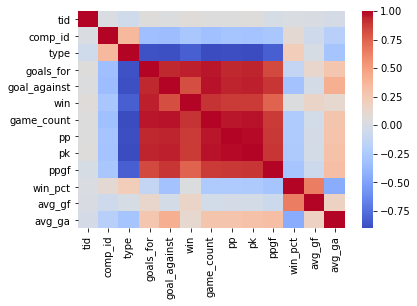

In [52]:
#Correlations
sns.heatmap(NHL_Team_Stats.corr(), cmap = 'coolwarm')

In [29]:
#Save Dataframes as .csv files
NHL_Game.to_csv("NHL_Game2.csv", index=False)
NHL_Team_Stats.to_csv("NHL_Team_Stats.csv", index=False)
NHL_Team_R_Stats.to_csv("NHL_Team_R_Stats.csv", index=False)